In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic_data.dataset import Dataset
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression



ModuleNotFoundError: No module named 'synthetic_data'

In [99]:
dataset = Dataset(
    num_sets=2,
    num_neurons=500,
    latent_dim=100,
    latent_timescale=1,
    dt=0.1,
    max_firing_rate=100.0,
    trial_duration=10.0,
)

In [100]:
# Get a batch of data 
data_iter = iter(dataset)
batch = next(data_iter)
time, latents, spike_counts = batch['time'], batch['latents'], batch['spike_counts']

In [101]:
# Calcualte PCs of spike counts
N_PCS = 50
pca = PCA(n_components=N_PCS)
spike_counts_centered = spike_counts - spike_counts.mean(dim=0, keepdim=True)
pcs = pca.fit_transform(spike_counts_centered.numpy())
reg = LinearRegression().fit(pcs, latents.numpy()[:, :N_PCS])
pcs_aligned = reg.predict(pcs)
pcs = pcs_aligned

In [102]:
plt.style.use('./my_mpl_style.mplstyle')

def outset_axes(ax, offset_mm=2):
    """
    Applies a constant physical offset (in mm) to the bottom (X) and 
    left (Y) axes spines of a Matplotlib Axes object, making them appear 
    'outset' from the data area.

    This achieves a constant absolute widthfor the offset, regardless of 
    data scale.

    Args:
        ax (matplotlib.axes.Axes): The axes object to modify.
        offset_mm (float): The distance in millimeters to offset
                          the axes from the plot area. Default is 4.
    """
    offset_pt = offset_mm * 72 / 25.4  # Convert mm to points

    # 1. Set Spines to 'outward' position
    # This pushes the spine line exactly 'offset_pt' distance outward.
    ax.spines['bottom'].set_position(('outward', offset_pt))
    ax.spines['left'].set_position(('outward', offset_pt))


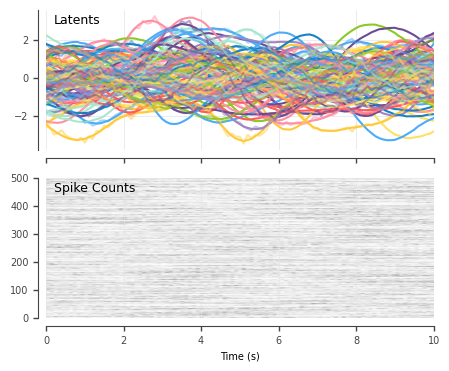

In [103]:
# Plot latents and alinged-spike-count PCs
fig, ax = plt.subplots(2,1, figsize=(5,4), sharex=True)
ax[0].plot(time, latents)
ax[0].text(0.02, 0.9, "Latents", transform=ax[0].transAxes)
ax[0].set_prop_cycle(None)  # reset color cycle
ax[0].plot(time, pcs, alpha=0.5)

# Plot spike counts
ax[1].imshow(spike_counts.T, aspect='auto', cmap='Greys', origin='lower', extent=[time[0], time[-1], 0, spike_counts.shape[1]])
ax[1].text(0.02, 0.9, "Spike Counts", transform=ax[1].transAxes)
ax[1].set_xlabel("Time (s)")

outset_axes(ax[0])
outset_axes(ax[1])
